<a href="https://colab.research.google.com/github/MagalyCabrera8/Produccion-/blob/main/Almacenaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO DIMENSIONAMIENTO DEL ALMACÉN COMPAÑÍA QUÍMICA S.A**

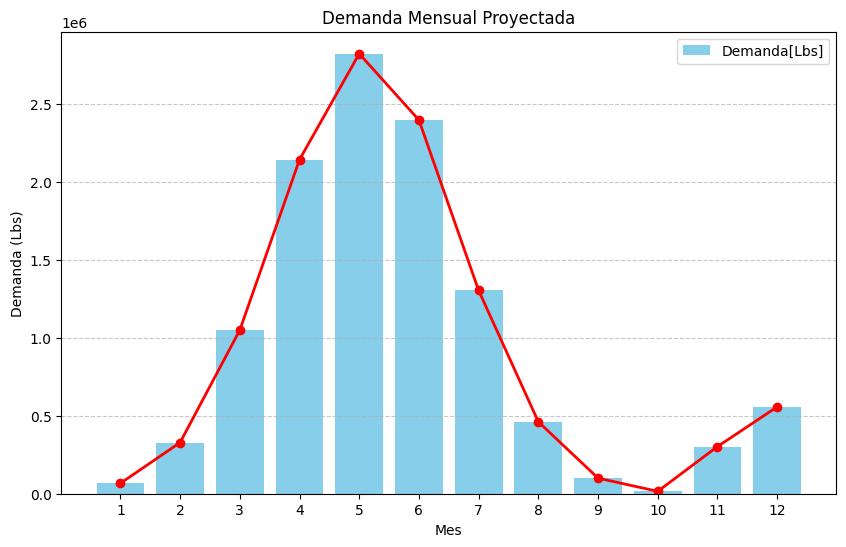

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
demandas = [66500, 328000, 1048500, 2141000, 2820000, 2395000,
            1303000, 460900, 99900, 15300, 302200, 556700] #Lb

#Gráfico
plt.figure (figsize=(10,6))
plt.bar(meses, demandas, color="skyblue", label = "Demanda[Lbs]")
plt.plot(meses, demandas, marker = "o" , color = "red", linewidth = 2)
plt.xlabel("Mes")
plt.ylabel("Demanda (Lbs)")
plt.title("Demanda Mensual Proyectada")
plt.xticks(meses)  # mostrar todos los meses
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

plt.show()



Datos técnicos requeridos y constantes






Cálculo del requerimiento mensual de espacio

/tmp/ipython-input-750573529.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


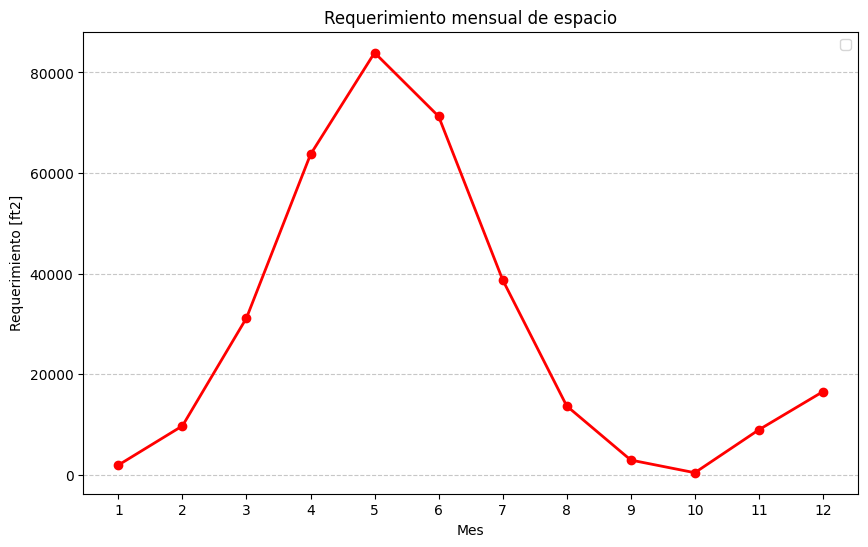

83928.57142857142

In [ ]:
i_rm = 3 #índice de rotación mensual
a_pasillo = 0.5 # 50 % del espacio debe ser para pasillos
a_variable = 0.7 # 70% del espacio del almacenaje se usá para anticipar la varibilidad de los requerimeintos
a_prom = 0.03125 # espacio promedio x producto [ft2/lb]
const_ = (1/i_rm)*a_prom* (1/a_pasillo) * (1/a_variable)
requerimiento = [demandas[i] * const_ for i in range(len(meses))]
#Gráfico
plt.figure (figsize=(10,6))
plt.plot(meses, requerimiento, marker = "o" , color = "red", linewidth = 2)
plt.xlabel("Mes")
plt.ylabel("Requerimiento [ft2]")
plt.title("Requerimiento mensual de espacio")
plt.xticks(meses)  # mostrar todos los meses
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

plt.show()
max(requerimiento)

# **CREACIÓN DE LA FUNCIÓN PARA GENERALIZAR EL COSTO**

In [ ]:
def costos_almacenaje(tamaño):
    i_rm = 3 #índice de rotación mensual
    a_pasillo = 0.5 # 50 % del espacio debe ser para pasillos
    a_variable = 0.7 # 70% del espacio del almacenaje se usá para anticipar la varibilidad de los requerimeintos
    a_prom = 0.03125 # espacio promedio x producto [ft2/lb]
    cost_inv = 30 # costo inversión a 20 años [$/ft2]
    cost_var = 0.05 # costo varibale [$/Lb]
    cost_fij = 3 # costos fijos del almacán [$/ft2.año]
    cost_rent = 0.1 # Costo de rentar [$/lb.mes]
    cos_man = 0.07 # Costo de manejo de entrada-salida [$/Lb]

    const_ = (1/i_rm)*a_prom* (1/a_pasillo) * (1/a_variable) # constante de multiplicación
    # Espacio requerido = Demanda mensual * const_
    inversion = tamaño *cost_inv #inversión anual [$/año]
    inv_mensual = inversion/(20*12) # inversión mensual [$/mes]
    alma_mensual = (cost_fij*tamaño)/12 # almacenaje mensual [$/mes]
    cost_fijmen = inv_mensual + alma_mensual # costo fijo mensual [$/mes]

    #Calculo del costo variable

    requerimiento = [demandas[i] * const_ for i in range(len(meses))] # Calculate requerimiento here
    tam_renta = [0] * len(demandas)  # Initialize with zeros
    por_ren = [0] * len(demandas)    # Initialize with zeros
    cos_almRent = [0] * len(demandas)    # Initialize with zeros
    cost_manejo = [0] * len(demandas)    # Initialize with zeros
    costo_rentar = [0] * len(demandas) # Initialize costo_rentar with zeros
    costo_total = [0] * len(demandas) # Initialize costo_total with zeros
    cos_varmen = [0]*len(demandas)


    for i in range(len(demandas)):


      if requerimiento[i] > tamaño:
            tam_renta[i] =   requerimiento[i]- tamaño
            por_ren[i] = (tam_renta[i]/requerimiento[i])
            cos_varmen[i] = demandas[i]*cost_var*(1-por_ren[i])
      else:
            tam_renta[i] = 0
            cos_varmen[i] = demandas[i]*cost_var
            por_ren[i] = 0
      # Porcentaje a rentar [porcentaje]
      cos_almRent[i] = demandas[i]*(1/i_rm)*por_ren[i]* cost_rent
      cost_manejo [i]= demandas[i]* por_ren[i]*cos_man
      costo_total[i] = cost_fijmen + cos_varmen[i] + cos_almRent[i] + cost_manejo[i]
    return costo_total, cost_manejo






[0.0,
 0.0,
 0.0,
 32270.0,
 79799.99999999999,
 50049.999999999985,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Evaluación de la función en el rango de los tamaños de acuerdo al requerimiento

Óptimo: tamaño = 63720 ft², costo total (suma mensual) = $913,351.28


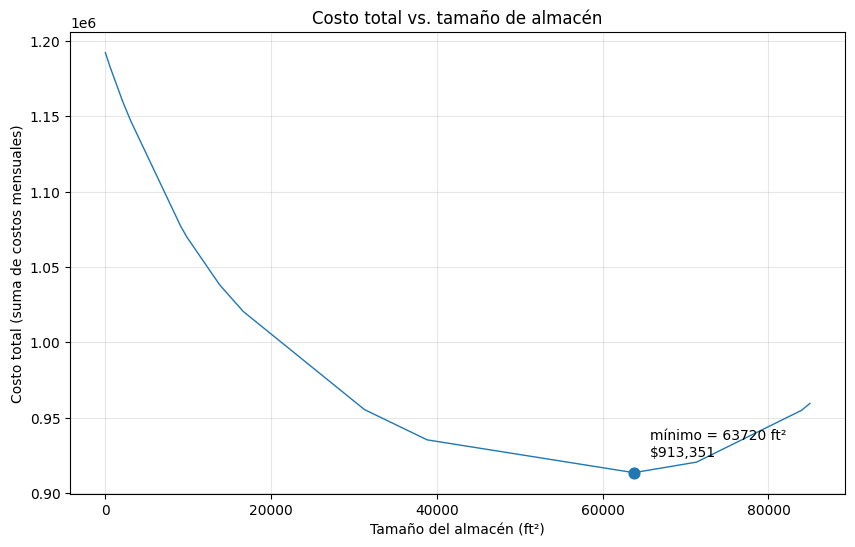

In [ ]:

import inspect

# 1) Vector de tamaños 0..85000 (paso 1)
tamanos = np.arange(0, 85001, 1, dtype=float)

# --- Helper para adaptarnos a la firma y retorno de tu función ---
sig = inspect.signature(costos_almacenaje)

def costo_total_de(t):
    """Devuelve la suma (p.ej. anual) del costo mensual devuelto por costos_almacenaje."""
    # Llamada flexible: con o sin 'demandas' según la firma detectada
    if len(sig.parameters) == 2:
        res = costos_almacenaje(t, demandas)         # tu variable global 'demandas'
    else:
        res = costos_almacenaje(t)

    # Si la función devuelve tupla (costo_total, ...), tomar el primero
    if isinstance(res, tuple):
        res = res[0]
    # Asegurar suma numérica
    return float(np.sum(res))

# 2) Evaluar la función en todo el vector
costos_totales = np.empty_like(tamanos, dtype=float)
for i, t in enumerate(tamanos):
    costos_totales[i] = costo_total_de(t)

# 3) Encontrar el mínimo
idx_min = int(np.argmin(costos_totales))
tam_opt = tamanos[idx_min]
costo_min = costos_totales[idx_min]

print(f"Óptimo: tamaño = {tam_opt:.0f} ft², costo total (suma mensual) = ${costo_min:,.2f}")

# 4) Graficar
plt.figure(figsize=(10,6))
plt.plot(tamanos, costos_totales, linewidth=1)
plt.scatter([tam_opt], [costo_min], s=60)
plt.title("Costo total vs. tamaño de almacén")
plt.xlabel("Tamaño del almacén (ft²)")
plt.ylabel("Costo total (suma de costos mensuales)")
plt.grid(True, alpha=0.3)
plt.annotate(f"mínimo = {tam_opt:.0f} ft²\n${costo_min:,.0f}",
             xy=(tam_opt, costo_min), xytext=(12,12),
             textcoords='offset points', fontsize=10)
plt.show()


CÓDIGO PARA EL TALLER DE ALMACENAJE


In [ ]:
import numpy as np

def costos_almacenaje1(tamaño):
    i_rm = 2 #índice de rotación mensual
    a_variable = 0.7 # 70% del espacio del almacenaje se usá para anticipar la varibilidad de los requerimeintos
    anch_esti = 1.2 #ancho estiba [m]
    lar_esti = 1 #largo estiba [m]
    alt_esti = 0.145 # alto estiba  [m]
    pes_esti = 30 # peso estiba [kg]
    cajas_tot = 132 # cajas totales en una estiba


    demandas = [600, 1200, 1500, 800, 650, 1300, 1750, 495, 1600, 900, 1100, 1400]
    demandas = np.ceil(np.array(demandas) / 9 * 1000).astype(int)
    a_prom = (anch_esti * lar_esti)/132 # espacio promedio x estiba
    P = 100* tamaño
    cuota = P*0.02/(1-(1+0.02)**(-60))  #Valor cuota mensual
    cost_var = 2 # costo varibale [$/caja]
    cost_fij = 3 # costos fijos del almacán [$/m2]
    cost_rent = 6 # Costo de rentar [$/caja]
    cos_man = 1.5 # Costo de manejo de entrada-salida [$/caja]

    const_ = (1/i_rm)*a_prom * (1/a_variable) # constante de multiplicación
    # Espacio requerido = Demanda mensual * const_


    #Calculo del costo variable

    requerimiento = [demandas[i] * const_ for i in range(len(demandas))] # Calculate requerimiento here
    tam_renta = [0] * len(demandas)  # Initialize with zeros
    por_ren = [0] * len(demandas)    # Initialize with zeros
    cos_almRent = [0] * len(demandas)    # Initialize with zeros
    cost_manejo = [0] * len(demandas)    # Initialize with zeros
    costo_total = [0] * len(demandas) # Initialize costo_total with zeros
    cos_fijmen = [0]*len(demandas)
    cos_varmen = [0]*len(demandas)
    for i in range(len(demandas)):


      if requerimiento[i] > tamaño:
            tam_renta[i] =   requerimiento[i]- tamaño
            por_ren[i] = (tam_renta[i]/requerimiento[i])
            cos_varmen[i] = demandas[i]*cost_var*(1-por_ren[i])
      else:
            tam_renta[i] = 0
            cos_varmen[i] = demandas[i]*cost_var
            por_ren[i] = 0
      # Porcentaje a rentar [porcentaje]
      cos_fijmen[i] = cost_fij*tamaño + cuota # Calculate cos_fijmen inside the loop
      cos_almRent[i] = demandas[i]*(1/i_rm)*por_ren[i]* cost_rent
      cost_manejo [i]= demandas[i]* por_ren[i]*cos_man
      costo_total[i] = cos_fijmen[i] + cos_varmen[i] + cos_almRent[i] + cost_manejo[i]
    costo_total= sum(costo_total)
    return requerimiento


costos_almacenaje1(700)

[np.float64(432.9025974025974),
 np.float64(865.8051948051948),
 np.float64(1082.2532467532467),
 np.float64(577.2012987012987),
 np.float64(468.98051948051943),
 np.float64(937.9545454545454),
 np.float64(1262.6298701298701),
 np.float64(357.1428571428571),
 np.float64(1154.4025974025974),
 np.float64(649.3506493506493),
 np.float64(793.6558441558441),
 np.float64(1010.1038961038961)]

Óptimo: tamaño = 1263 m², costo total (suma mensual) = $3,043,522.73


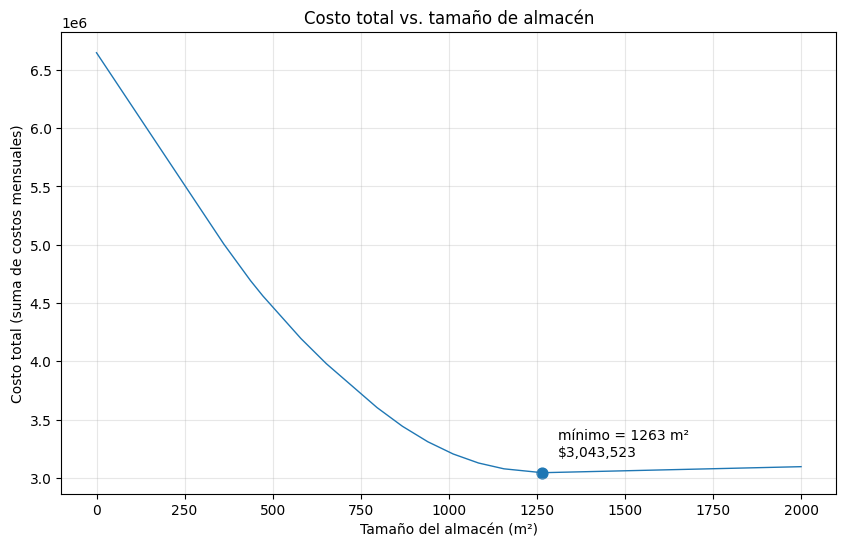

In [ ]:
# 1) Vector de tamaños 0..85000 (paso 1)
tamanos = np.arange(0, 2000, 1, dtype=float)

# --- Helper para adaptarnos a la firma y retorno de tu función ---
sig = inspect.signature(costos_almacenaje)

def costo_total_de(t):
    """Devuelve la suma (p.ej. anual) del costo mensual devuelto por costos_almacenaje."""
    # Llamada flexible: con o sin 'demandas' según la firma detectada
    if len(sig.parameters) == 2:
        res = costos_almacenaje1(t, demandas)         # tu variable global 'demandas'
    else:
        res = costos_almacenaje1(t)

    # Si la función devuelve tupla (costo_total, ...), tomar el primero
    if isinstance(res, tuple):
        res = res[0]
    # Asegurar suma numérica
    return float(np.sum(res))

# 2) Evaluar la función en todo el vector
costos_totales = np.empty_like(tamanos, dtype=float)
for i, t in enumerate(tamanos):
    costos_totales[i] = costo_total_de(t)

# 3) Encontrar el mínimo
idx_min = int(np.argmin(costos_totales))
tam_opt = tamanos[idx_min]
costo_min = costos_totales[idx_min]

print(f"Óptimo: tamaño = {tam_opt:.0f} m², costo total (suma mensual) = ${costo_min:,.2f}")

# 4) Graficar
plt.figure(figsize=(10,6))
plt.plot(tamanos, costos_totales, linewidth=1)
plt.scatter([tam_opt], [costo_min], s=60)
plt.title("Costo total vs. tamaño de almacén")
plt.xlabel("Tamaño del almacén (m²)")
plt.ylabel("Costo total (suma de costos mensuales)")
plt.grid(True, alpha=0.3)
plt.annotate(f"mínimo = {tam_opt:.0f} m²\n${costo_min:,.0f}",
             xy=(tam_opt, costo_min), xytext=(12,12),
             textcoords='offset points', fontsize=10)
plt.show()
